# Modeling: Sweep chain and sweep sketch

This example shows how use the ``sweep_sketch()`` and ``sweep_chain()``
functions to create more complex extrusion profiles. You use the ``sweep_sketch()``
function with a closed sketch profile and the ``sweep_chain()`` function for an open profile.

In [1]:
# Imports
import numpy as np

from ansys.geometry.core import Modeler
from ansys.geometry.core.math import (
  Plane,
  Point2D,
  Point3D,
  UNITVECTOR3D_X,
  UNITVECTOR3D_Y,
  UNITVECTOR3D_Z,
)
from ansys.geometry.core.shapes import Circle, Ellipse, Interval
from ansys.geometry.core.sketch import Sketch

In [2]:
# Initialize the modeler for this example notebook
m = Modeler()

## Example: Creating a donut

The following code snippets show how to use the `sweep_sketch()` function to create a 3D donut
shape in the ``Design`` object. The process involves initializing a sketch design for the donut,
defining two circles for the profile and path, and then performing a sweep operation to generate
the donut shape.

### Initialize the donut sketch design

A new design sketch named "donut" is created.

In [3]:
# Initialize the donut sketch design
design_sketch = m.create_design("donut")

### Define circle parameters

``path_radius`` is set to 5 units, representing the radius of the circular path that the profile
circle sweeps along.
``profile_radius`` is set to 2 units, representing the radius of the profile circle that sweeps
along the path to create the donut body.

In [4]:
# Donut parameters
path_radius = 5
profile_radius = 2

### Create the profile circle

A circle is created on the XZ-plane centered at the coordinates (5, 0, 0) with a radius
defined by ``profile_radius``. This circle serves as the profile or cross-sectional
shape of the donut.

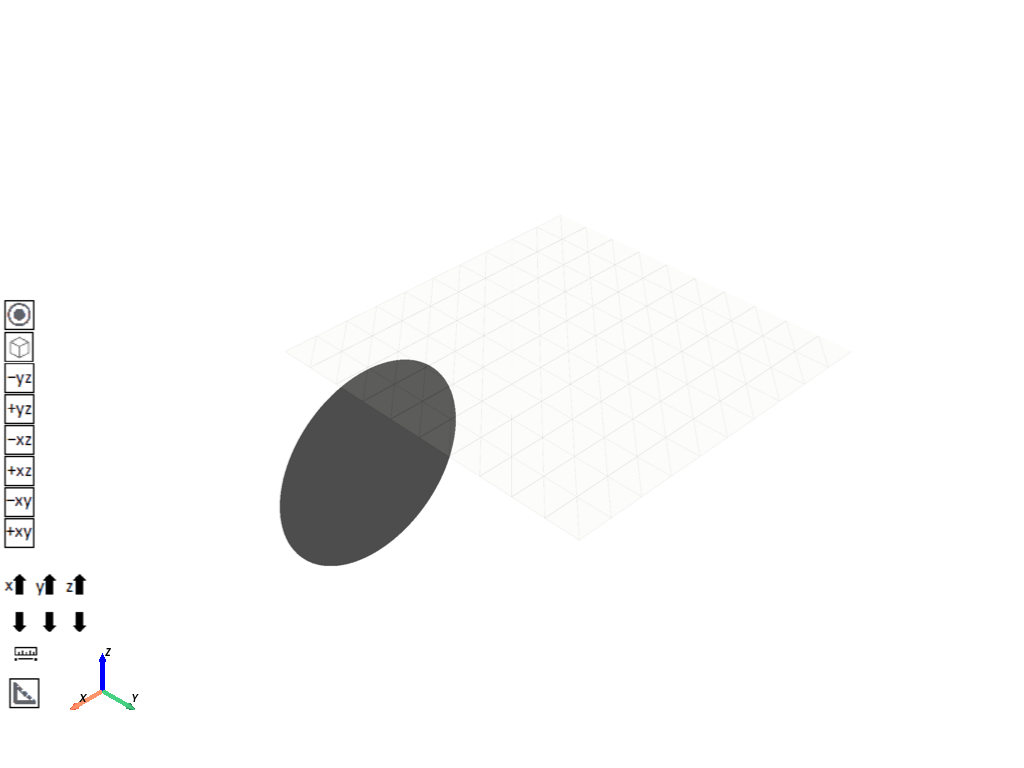

In [5]:
# Create the circlular profile on the XZ-plane centered at (5, 0, 0)
# with a radius of 2
plane_profile = Plane(direction_x=UNITVECTOR3D_X, direction_y=UNITVECTOR3D_Z)
profile = Sketch(plane=plane_profile)
profile.circle(Point2D([path_radius, 0]), profile_radius)

profile.plot()

### Create the path circle

Another circle, representing the path along which the profile circle is swept, is created on
the XY-plane centered at (0, 0, 0). The radius of this circle is defined by ``path_radius``.

In [6]:
# Create the circlular path on the XY-plane centered at (0, 0, 0) with radius 5
path = [Circle(Point3D([0, 0, 0]), path_radius).trim(Interval(0, 2 * np.pi))]

### Perform the sweep operation

The sweep operation uses the profile circle and sweeps it along the path circle to create the
3D body of the donut. The result is stored in the variable ``body``.

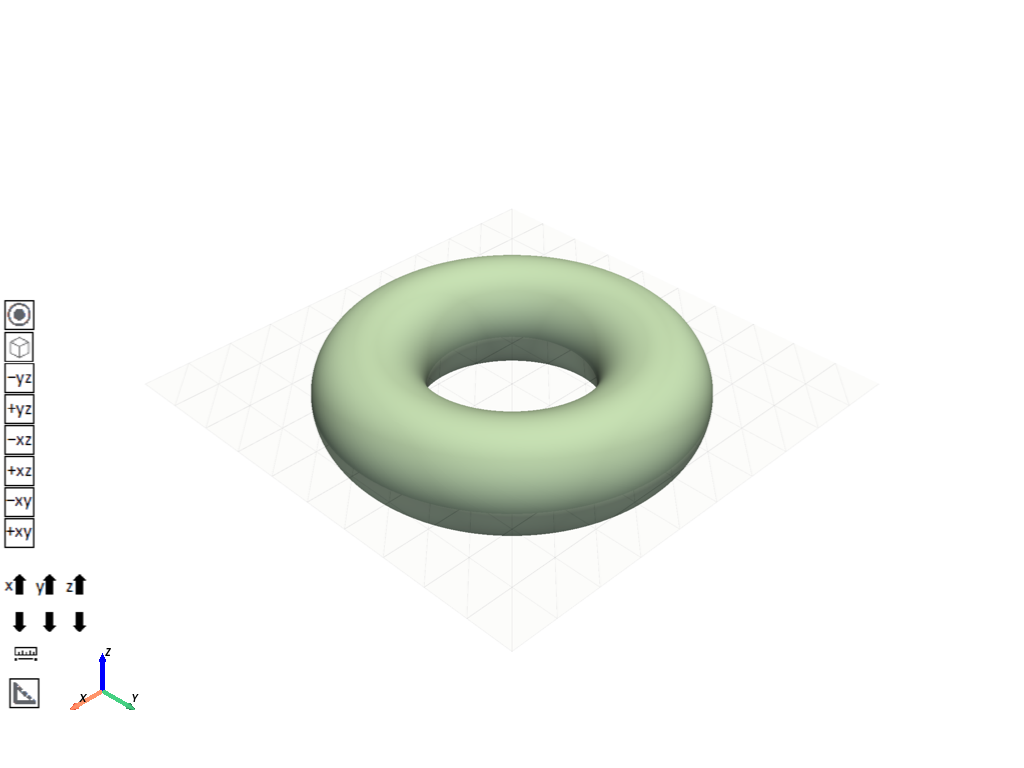

In [7]:
# Perform the sweep and examine the final body created
body = design_sketch.sweep_sketch("donutsweep", profile, path)

design_sketch.plot()

## Example: Creating a bowl

This code demonstrates the process of using the ``sweep_chain()`` function to create a 3D model
of a stretched bowl in the ``Design`` object. The model is generated by defining a quarter-ellipse
as a profile and sweeping it along a circular path, creating a bowl shape with a stretched profile.

### Initialize the bowl design

A design chain named "bowl" is created to initiate the bowl design process.

In [8]:
# Initialize the bowl sketch design
design_chain = m.create_design("bowl")

### Define parameters

``radius`` is set to 10 units, used for both the profile and path definitions.

In [9]:
# Define the radius parameter
radius = 10

### Create the profile shape

A quarter-ellipse profile is created with a major radius equal to 10 units and a
minor radius equal to 5 units. The ellipse is defined in a 3D space with a specific
orientation and then trimmed to a quarter using an interval from 0 to pi/2 radians.
This profile shapes the bowl's side.

In [10]:
# Create quarter-ellipse profile with major radius = 10, minor radius = 5
profile = [
   Ellipse(
       Point3D([0, 0, radius / 2]),
       radius,
       radius / 2,
       reference=UNITVECTOR3D_X,
       axis=UNITVECTOR3D_Y,
   ).trim(Interval(0, np.pi / 2))
]

### Create the path

A circular path is created, positioned parallel to the XY-plane but shifted upwards
by 5 units (half the major radius). The circle has a radius of 10 units and is trimmed
to form a complete loop with an interval from 0 to 2pi radians. This path defines the
sweeping trajectory for the profile to create the bowl.

In [11]:
# Create circle on the plane parallel to the XY-plane but moved up
# by 5 units with radius 10
path = [Circle(Point3D([0, 0, radius / 2]), radius).trim(Interval(0, 2 * np.pi))]

### Perform the sweep operation

The bowl body is generated by sweeping the quarter-ellipse profile along the circular path.
The sweep operation molds the profile shape along the path to form the stretched bowl. The
result of this operation is stored in the variable ``body``.

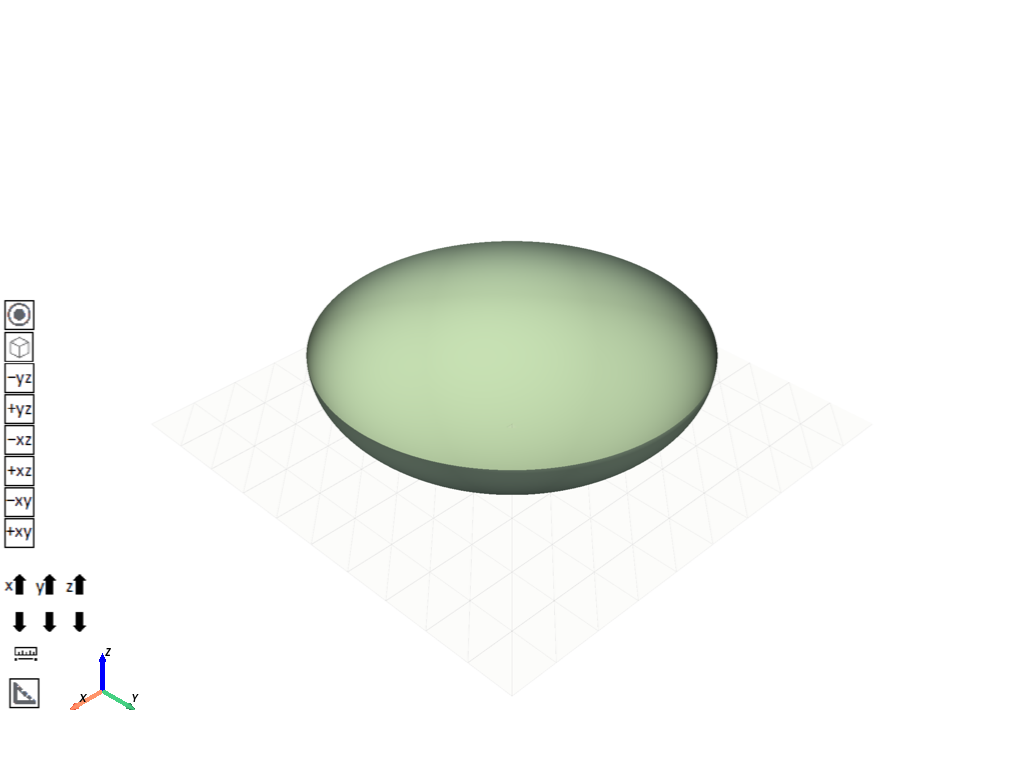

In [12]:
# Create the bowl body
body = design_chain.sweep_chain("bowlsweep", path, profile)

design_chain.plot()